## Medical Cost Personal Datasets
- 각각의 col 정보와 보험료와의 상관관계를 분석해보기
- Dataset : https://www.kaggle.com/mirichoi0218/insurance

### 0. 라이브러리 호출

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Dataset 불러오기
- 전체 데이터 확인

In [2]:
medical_df = pd.read_csv('../input/insurance/insurance.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# 결측치 확인
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


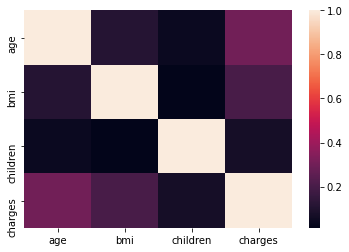

In [4]:
# 상관관계 확인
# medical_df.corr()
sns.heatmap(medical_df.corr())
plt.show()

- 상관 관계가 거의 없다.

### 2.개별 데이터 확인

#### 1. 성별과 요금과의 관계

In [5]:
medical_df.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

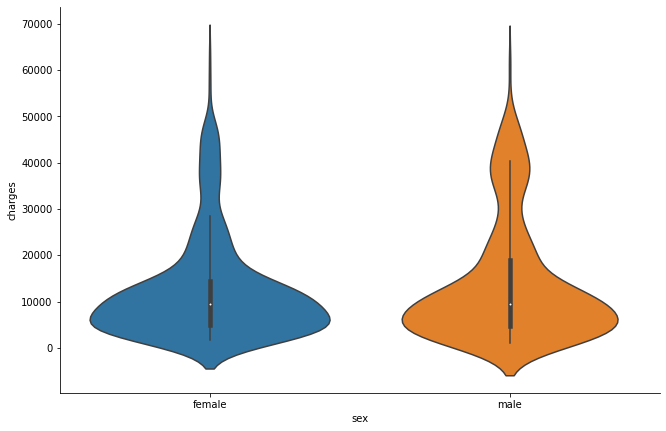

In [6]:
s = sns.catplot(x='sex', y='charges',data=medical_df, kind='violin')
s.fig.set_size_inches(10,6)
plt.show()

성별과 요금의 관계는 여성이 조금 더 많이 지불하는 경향이 있어보이지만, 거의 비슷하다

#### 2.나이와 요금과의 관계

In [7]:
medical_df.groupby('age')['charges'].mean()

age
18     7086.217556
19     9747.909335
20    10159.697736
21     4730.464330
22    10012.932802
23    12419.820040
24    10648.015962
25     9838.365311
26     6133.825309
27    12184.701721
28     9069.187564
29    10430.158727
30    12719.110358
31    10196.980573
32     9220.300291
33    12351.532987
34    11613.528121
35    11307.182031
36    12204.476138
37    18019.911877
38     8102.733674
39    11778.242945
40    11772.251310
41     9653.745650
42    13061.038669
43    19267.278653
44    15859.396587
45    14830.199856
46    14342.590639
47    17653.999593
48    14632.500445
49    12696.006264
50    15663.003301
51    15682.255867
52    18256.269719
53    16020.930755
54    18758.546475
55    16164.545488
56    15025.515837
57    16447.185250
58    13878.928112
59    18895.869532
60    21979.418507
61    22024.457609
62    19163.856573
63    19884.998461
64    23275.530837
Name: charges, dtype: float64

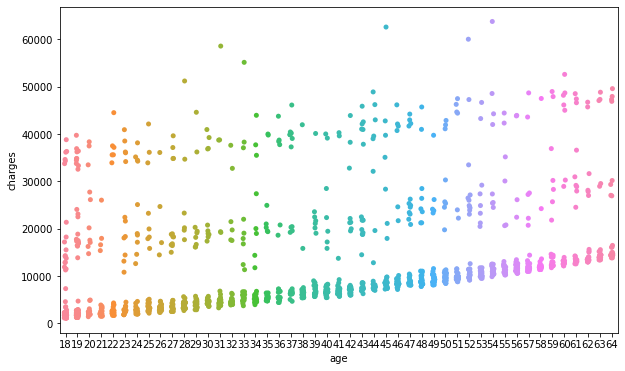

In [8]:
plt.figure(figsize=(10,6))
sns.stripplot(x='age', y='charges', data=medical_df)
plt.show()

대체적으로 나이가 많아질수록 보험료가 증가하는 경향이 있다.

#### 3.bmi 지수와 요금의 관계

In [9]:
medical_df[['bmi', 'charges']]

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520
...,...,...
1333,30.970,10600.54830
1334,31.920,2205.98080
1335,36.850,1629.83350
1336,25.800,2007.94500


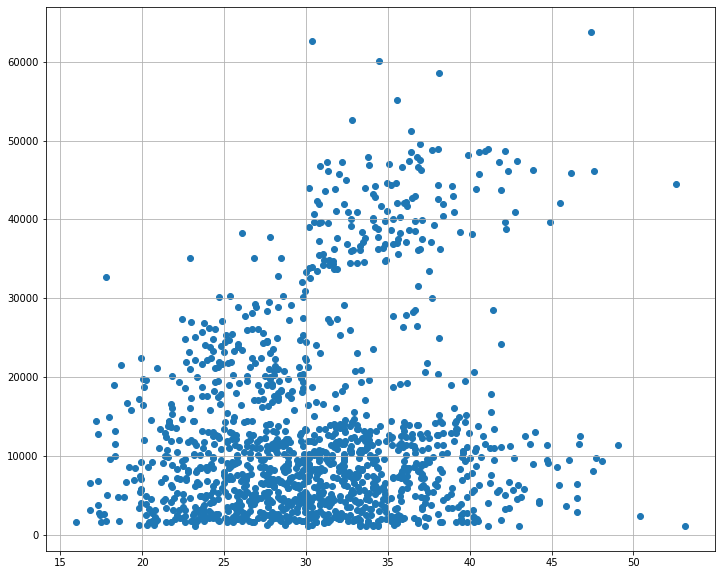

In [10]:
plt.figure(figsize=(12,10))
plt.scatter(medical_df['bmi'], medical_df['charges'])
plt.grid()
# sns.stripplot(x='bmi', y='charges', data=medical_df)
plt.show()

BMI가 높을 수록 보험료를 더 많이 내는 경향이 있어보인다. 
그렇다면 BMI 와 흡연 유무와의 관계를 비교해 보자.

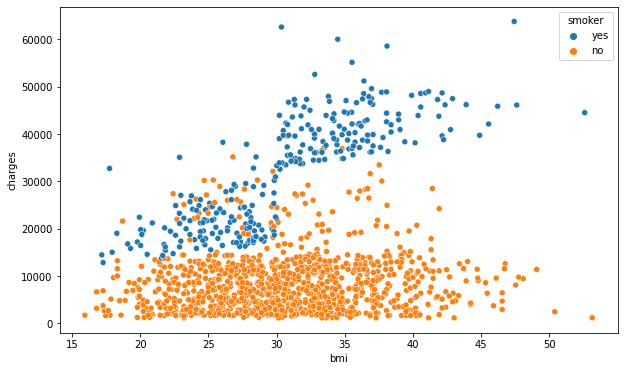

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=medical_df)

plt.show()

BMI와 Charges 와의 양의 관계가 사실 대부분 smoker의 지표이다.
따라서 BMI 와 Charges와의 관계가 거의 없고, smoker의 영향으로
이런 그래프가 나왔다고 생각할 수 있다.

#### 4. children 과 요금과의 관계

In [11]:
medical_df.groupby('children')['charges'].mean()

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

<AxesSubplot:xlabel='children'>

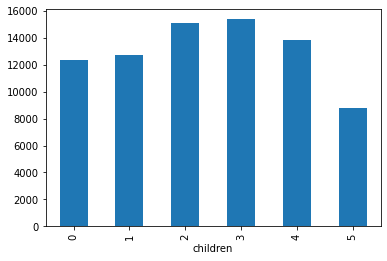

In [12]:
medical_df.groupby('children')['charges'].mean().plot.bar()

아이수가 2, 3명일 때 요금을 좀 더 많이 내는 경향이 있다.

#### 5. 흡연과 요금

In [13]:
medical_df.groupby(['smoker'])['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

흡연을 하는 사람이 보험료를 더 많이 낸다.

#### 5.1 성별과 흡연

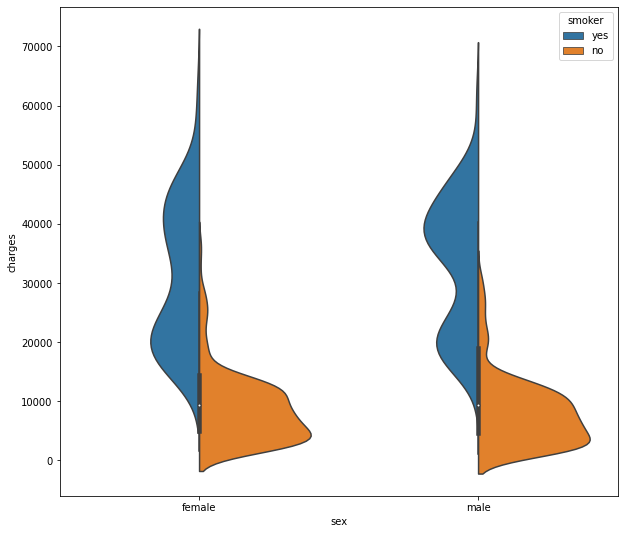

In [14]:
plt.figure(figsize=(10,9))
sns.violinplot(x='sex',y='charges',hue='smoker',data=medical_df,split=True)
plt.show()

동일 흡연자일 경우 남성이 조금 더 높은 금액을 내는 경우가 있다.

In [15]:
pd.crosstab(medical_df['smoker'],medical_df['sex'])

sex,female,male
smoker,,
no,547,517
yes,115,159


남성의 흡연율이 여성에비해 상대적으로 높다

#### 6. 지역과 요금

In [16]:
medical_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
medical_df.groupby('region')[['charges']].mean().sort_values(by='charges', ascending=False)

,charges
region,
southeast,14735.411438
northeast,13406.384516
northwest,12417.575374
southwest,12346.937377


southest 비용의 charges가 가장 높다

In [18]:
pd.crosstab(medical_df['region'], medical_df['smoker'])

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


southest 지역의 흡연자가 더 많아서 보험요금이 더 나온 경우가 있다.

결론 : Smoker, 즉 흡연의 여부가 건강보험료와 가장 관계가 깊다.